In [2]:
pip install  -q kaggle

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
 pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.5 MB/s eta 0:00:0000:01
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
Note: you may need to restart the kernel to use updated packages.


In [25]:
!pip install  -q kaggle

In [24]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [23]:
!touch ~/.kaggle/kaggle.json

In [22]:
api_token = {"username": "michelle1871", "key": "1b3ed14dffcfdf6fa4a17b542928e2f5"}

In [26]:
import json
with open('/root/.kaggle/kaggle.json','w') as file:
    json.dump(api_token, file)

In [27]:
!chmod 600 ~/.kaggle/kaggle.json

In [28]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia --force


100%|██████████████████████████████████████▉| 2.29G/2.29G [00:13<00:00, 169MB/s]
100%|██████████████████████████████████████| 2.29G/2.29G [00:24<00:00, 99.3MB/s]


In [30]:
import zipfile
with zipfile.ZipFile('./chest-xray-pneumonia.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

In [44]:
import glob
import random
import matplotlib.pyplot as plt

def get_random_image(dir, condition) :
    placeholder = ''
    if condition == 'n' :
        placeholder = 'NORMAL'
    elif condition == 'p' :
        placeholder = 'PNEUMONIA'
    else :
        raise Exception("Sorry, invalid condition")
    folder=f"./data/chest_xray/{dir}/{placeholder}/*.jpeg"
    img_paths=glob.glob(folder)
    max_length=len(img_paths)
    randomNumber=random.randint(0,max_length)
    for index, item in enumerate(img_paths, start=1):
        if index==randomNumber:
            print(index, item)
#             reads from file to array
            image =plt.imread(item) 
#     shows the image, reads from array
            readyImage=plt.imshow(image)
           
             
            return readyImage
    
    
            
        
    
    
    

2518 ./data/chest_xray/train/PNEUMONIA/person397_virus_790.jpeg


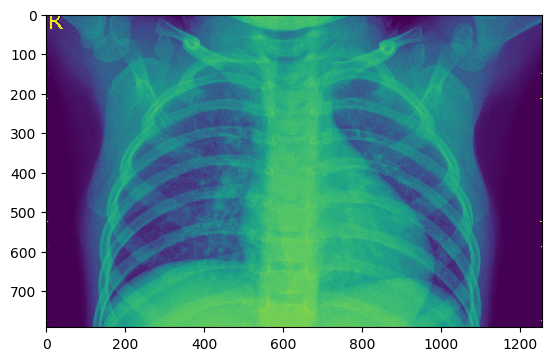

In [60]:
get_random_image("train", "p")
plt.show()

In [61]:

# need to put both the normal and not normal pics in the same file to do training
# any img name with "person " in it is not normal
#need to use transfer learning, use resnet
# need to resize images if we want to use them 224*224 
#also needs the pic to be 3 channel
#transfer learning: use a model already trained and has weights. faster
#save them in greyscale
from PIL import Image


image = Image.open('data/chest_xray/train/PNEUMONIA/person397_virus_790.jpeg')
print(image.format)
print(image.size)
print(image.mode)


JPEG
(1256, 792)
L


In [66]:
#if the image is RGBA, a means alpha which controlls the opacity
#need to convert to RGB
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder ='./data/chest_xray/train/*/*.jpeg'


counterPneu = 0
counterNormal = 0

img_paths=glob.glob(folder)

for i in img_paths:
    if "person" in i :
        full_size_image=Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/train'+'/train_pneumonia' + str(counterPneu) + '.jpeg', arr=im, format='jpeg', cmap='gray')
        counterPneu+=1
    else :
        full_size_image=Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/train'+'/train_normal' + str(counterNormal) + '.jpeg', arr=im, format='jpeg', cmap='gray')
        counterNormal+=1




In [67]:
# do the resizing in train, test, validate set
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder ='./data/chest_xray/test/*/*.jpeg'


counterPneu = 0
counterNormal = 0

img_paths=glob.glob(folder)

for i in img_paths:
    if "person" in i :
        full_size_image=Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/test'+'/test_pneumonia' + str(counterPneu) + '.jpeg', arr=im, format='jpeg', cmap='gray')
        counterPneu+=1
    else :
        full_size_image=Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/test'+'/test_normal' + str(counterNormal) + '.jpeg', arr=im, format='jpeg', cmap='gray')
        counterNormal+=1


In [68]:
# do the resizing in train, test, validate set
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder ='./data/chest_xray/val/*/*.jpeg'


counterPneu = 0
counterNormal = 0

img_paths=glob.glob(folder)

for i in img_paths:
    if "person" in i :
        full_size_image=Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/val'+'/val_pneumonia' + str(counterPneu) + '.jpeg', arr=im, format='jpeg', cmap='gray')
        counterPneu+=1
    else :
        full_size_image=Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/val'+'/val_normal' + str(counterNormal) + '.jpeg', arr=im, format='jpeg', cmap='gray')
        counterNormal+=1

In [107]:
#data visualization
import glob
import pandas as pd
folder = './data/chest_xray/*/*.jpeg'

category = []
condition_of_lung =[]
filenames=[]


all_files =glob.glob(folder)

for filename in all_files:
    if "train" in filename:
        if "pneumonia" in filename:
            category.append("train")              
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
            
        elif "normal" in filename:
            category.append("train")
            filenames.append(filename)
            condition_of_lung.append("normal")
            
    elif "test" in filename:
        if "pneumonia" in filename:
            category.append("test")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
            
        elif "normal" in filename:
            category.append("test")
            filenames.append(filename)
            condition_of_lung.append("normal")
    elif "val" in filename:
        if "pneumonia" in filename:
            category.append("val")
            filenames.append(filename)
            condition_of_lung.append("pneumonia") 
        elif "normal" in filename :
            category.append("val")
            filenames.append(filename)
            condition_of_lung.append("normal")
            
            
        
     
            
all_data_df = pd.DataFrame({"dataset type": category, "x-ray result": condition_of_lung, "filename":filenames})
print(all_data_df.head())
        
        

  dataset type x-ray result                                       filename
0         test       normal       ./data/chest_xray/test/test_normal4.jpeg
1         test    pneumonia    ./data/chest_xray/test/test_pneumonia1.jpeg
2         test    pneumonia  ./data/chest_xray/test/test_pneumonia359.jpeg
3         test    pneumonia  ./data/chest_xray/test/test_pneumonia197.jpeg
4         test       normal     ./data/chest_xray/test/test_normal103.jpeg


In [109]:
print(category[1])
print(condition_of_lung[1])
print(filenames[1])

test
pneumonia
./data/chest_xray/test/test_pneumonia1.jpeg


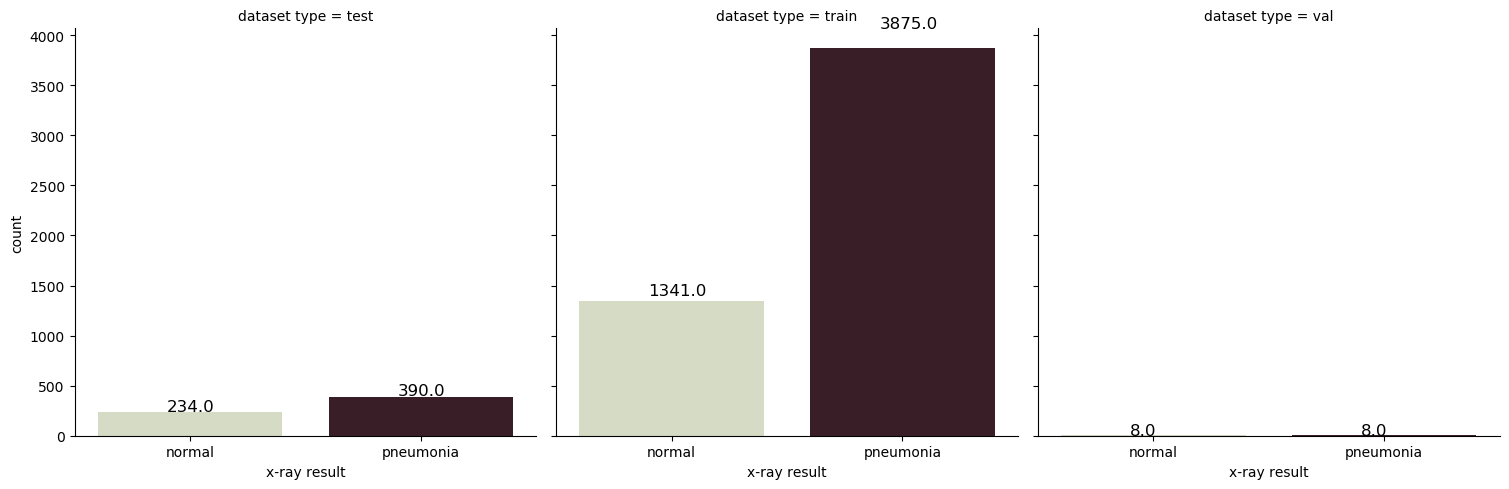

In [127]:
import seaborn as sns


g=sns.catplot(x="x-ray result", col="dataset type",kind="count", palette="ch:.55", data=all_data_df, legend=True)

for i in range(0,3):
    ax=g.facet_axis(0,i)
    for p in ax.patches:
        ax.text(p.get_x()+0.3,
        p.get_height()*1.05,
        '{0:.1f}'.format(p.get_height()),
        color='black',
        rotation='horizontal',
        size='large')

        
        
        
plt.show(g)


        





In [129]:
#create lst file to train the model

import glob
import pandas as pd
import os
train_folder = './data/chest_xray/train/*.jpeg'
train_df_lst=pd.DataFrame(columns=['labels','s3_path'],dtype=object)
train_imgs_path=glob.glob(train_folder)
counter=0
class_arg=''

for i in train_imgs_path:
    if "pneumonia" in i:
        class_arg =1
    else:
        class_arg=0
    train_df_lst.loc[counter]=[class_arg, os.path.basename(i)]
    counter+=1
print(train_df_lst.head())

  labels                   s3_path
0      0     train_normal1203.jpeg
1      1  train_pneumonia3349.jpeg
2      1   train_pneumonia478.jpeg
3      1  train_pneumonia1567.jpeg
4      1  train_pneumonia2296.jpeg


In [130]:
#create lst file to train the model

import glob
import pandas as pd
import os
test_folder = './data/chest_xray/test/*.jpeg'
test_df_lst=pd.DataFrame(columns=['labels','s3_path'],dtype=object)
test_imgs_path=glob.glob(test_folder)
counter=0
class_arg=''

for i in test_imgs_path:
    if "pneumonia" in i:
        class_arg =1
    else:
        class_arg=0
    test_df_lst.loc[counter]=[class_arg, os.path.basename(i)]
    counter+=1
print(test_df_lst.head())

  labels                 s3_path
0      0       test_normal4.jpeg
1      1    test_pneumonia1.jpeg
2      1  test_pneumonia359.jpeg
3      1  test_pneumonia197.jpeg
4      0     test_normal103.jpeg


In [133]:
def save_to_lst(df, prefix):
    return df[["labels","s3_path"]].to_csv(
        f"{prefix}.lst", sep='\t', index=True, header=False
            
    )
save_to_lst(train_df_lst.copy(),"train")
save_to_lst(test_df_lst.copy(),"test")


In [2]:
#creating s3 buckets 
bucket='medical-ai-chest-xray-michelle'
print("bucket:{}".format(bucket))
region='us-east-1'
print("region:{}".format(region))
roleArn='arn:aws:s3:::medical-ai-chest-xray-michelle'
print("roleArn:{}".format(roleArn))


bucket:medical-ai-chest-xray-michelle
region:us-east-1
roleArn:arn:aws:s3:::medical-ai-chest-xray-michelle


In [3]:
import os

os.environ["DEFAULT_S3_BUCKET"]=bucket


In [9]:
!aws s3 sync ./data/chest_xray/train s3://${DEFAULT_S3_BUCKET}/train/


The user-provided path ./data/chest_xray/train does not exist.


In [10]:
!aws s3 sync ./data/chest_xray/test s3://${DEFAULT_S3_BUCKET}/test/


The user-provided path ./data/chest_xray/test does not exist.


In [11]:
import boto3

boto3.Session().resource('s3').Bucket(bucket).Object("train.lst").upload_file('./train.lst')

In [12]:
boto3.Session().resource('s3').Bucket(bucket).Object("test.lst").upload_file('./test.lst')

In [4]:
import sagemaker
from sagemaker import image_uris
import boto3
from sagemaker import get_execution_role
sess=sagemaker.Session()

algorithm_image=image_uris.retrieve(
    region=boto3.Session().region_name,
    framework="image-classification"
)

s3_output_location=f"s3://{bucket}/models/image_model"
print(algorithm_image)

811284229777.dkr.ecr.us-east-1.amazonaws.com/image-classification:1


In [26]:
role=get_execution_role()
print(role)

arn:aws:iam::580156821725:role/service-role/AmazonSageMaker-ExecutionRole-20220602T153952


In [9]:
img_classifier_model=sagemaker.estimator.Estimator(
    algorithm_image,
    role=role,
    instance_count=1,
    instance_type="ml.p2.xlarge",
    volumn_size=50,
    max_run=432000,
    input_model="File",
    output_path=s3_output_location,
    sagemaker_session=sess
    
)
print(img_classifier_model)

In [13]:
import glob
count = 0
for filepath in glob.glob('./data/chest_xray/train/*.jpeg'):
    count+=1
print(count)
#之前的train出错是因为count之前run是有具体数字的，后来删除了就变成0了，下面必须是有具体值

0


In [10]:
img_classifier_model.set_hyperparameters(
image_shape="3,224,224",
num_classes=2,
use_pretrained_model=1,
num_training_samples=5216,
augmentation_type='crop_color_transform',
epochs=15,
early_stopping=True,
early_stopping_min_epochs=8,
early_stopping_tolerance=0.0,
early_stopping_patience=5,
lr_scheduler_factor=0.1,
lr_scheduler_step='8,10,12'
    
)

In [11]:
from sagemaker.tuner import CategoricalParameter, ContinuousParameter, HyperparameterTuner

hyperparameter_ranges={
    
    
    "learning_rate": ContinuousParameter(0.01,0.1),
    "mini_batch_size":CategoricalParameter([8,16,32]),
    "optimizer":CategoricalParameter(["sgd","adam"])
}

In [12]:
objective_metric_name="validation:accuracy"
objective_type="Maximize"
max_jobs=5
max_parallel_jobs=1


In [13]:
tuner=HyperparameterTuner(estimator=img_classifier_model,
                          objective_metric_name=objective_metric_name,
                          hyperparameter_ranges=hyperparameter_ranges,
                          objective_type=objective_type,
                          max_jobs=max_jobs,
                          max_parallel_jobs=max_parallel_jobs
                         )

In [14]:
from sagemaker.session import TrainingInput

model_inputs = {
    "train": sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/train/",content_type="application/x-image"),
    "validation":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/test/",content_type="application/x-image"),
     "train_lst": sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/train.lst",content_type="application/x-image"),
    "validation_lst":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/test.lst",content_type="application/x-image"),
}

In [15]:
import time
job_name_prefix="classifier"
timestamp=time.strftime("-%Y-%m-%d-%H-%M-%S", time.gmtime())
job_name=job_name_prefix+timestamp


In [ ]:
tuner.fit(inputs=model_inputs,job_name=job_name,logs=True)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [5]:
import sagemaker
from sagemaker import get_execution_role

In [6]:
role=get_execution_role()

In [7]:
model=sagemaker.model.Model(
    image_uri=algorithm_image,
    model_data='s3://medical-ai-chest-xray-michelle/models/image_model/classifier-2022-06-07-23-59-18-005-00e800a7/output/model.tar.gz',
    role=role
)

In [14]:
endpoint_name='Demo-image-classifier-Pneumonia-try1-deploy2'
#shut the endpoint down when done with evaluation, and reopen the endpoint when want to deploy to internet when we want to serve instances there
deployment=model.deploy(
    initial_instance_count=1,
    instance_type='ml.m4.xlarge',
    endpoint_name=endpoint_name
)

----------!

In [15]:
# do some local inference 
from sagemaker.predictor import Predictor
predictor=Predictor("Demo-image-classifier-Pneumonia-try1-deploy2")

In [16]:
from sagemaker.serializers import IdentitySerializer
import base64

file_name='data/chest_xray/val/val_normal7.jpeg'

predictor.serializer=IdentitySerializer("image/jpeg")
with open(file_name, "rb") as f:
    payload=f.read()
    
inference=predictor.predict(data=payload)
print(inference)
#the first means the prob of normal ,second means the prob of pneumonia


b'[0.8921862244606018, 0.10781379044055939]'


In [11]:
import glob
import json
import numpy as np
file_path='data/chest_xray/val/*.jpeg'
files=glob.glob(file_path)

y_true=[]
y_pred=[]

def make_pred():
    for file in files:
        if "normal" in file:
            with open(file,"rb") as f:
                payload=f.read()
                inference=predictor.predict(data=payload).decode("utf-8")
                result=json.loads(inference)
                predicted_class=np.argmax(result)
                y_true.append(0)
                y_pred.append(predicted_class)
        elif "pneumonia" in file:
            with open(file,"rb") as f:
                payload=f.read()
                inference=predictor.predict(data=payload).decode("utf-8")
                result=json.loads(inference)
                predicted_class=np.argmax(result)
                y_true.append(1)
                y_pred.append(predicted_class)

                
                
make_pred()
print(y_true)
print(y_pred)

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]
[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]


In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)


array([[8, 0],
       [0, 8]])

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

